In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df = pd.read_csv('train_ctrUa4K.csv')

test_df = pd.read_csv('test_lAUu6dG.csv')

sample_df = pd.read_csv('sample_submission_49d68Cx.csv')

In [3]:
train_df['Source'] = 'train'

test_df['Source'] = 'test'

In [4]:
train_df.shape,test_df.shape

((614, 14), (367, 13))

In [5]:
df = pd.concat([train_df, test_df], axis = 0)

In [6]:
df[:2]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train


In [7]:
df[['Gender', 'ApplicantIncome','CoapplicantIncome']].groupby(['Gender'],
                                                as_index = False).mean().sort_values(by = 'Gender', ascending = False)

,Gender,ApplicantIncome,CoapplicantIncome
1,Male,5256.925161,1716.340542
0,Female,4458.906593,1132.604396


In [8]:
df[['Married', 'ApplicantIncome', 'CoapplicantIncome']].groupby(['Married'],
                                               as_index = False).mean().sort_values(by = 'Married', ascending = False)

,Married,ApplicantIncome,CoapplicantIncome
1,Yes,5395.464342,1732.776418
0,No,4778.731988,1375.631124


In [9]:
df[['Dependents', 'ApplicantIncome', 'CoapplicantIncome']].groupby(['Dependents'],
                                               as_index = False).mean().sort_values(by = 'Dependents', ascending = False)

,Dependents,ApplicantIncome,CoapplicantIncome
3,3+,7865.197802,1527.043956
2,2,4907.162500,1715.023750
1,1,5534.100000,1558.762500
0,0,4706.222018,1620.422239


In [10]:
df[['Education', 'ApplicantIncome', 'CoapplicantIncome']].groupby(['Education'],
                                               as_index = False).mean().sort_values(by = 'Education', ascending = False)


,Education,ApplicantIncome,CoapplicantIncome
1,Not Graduate,3700.536697,1294.958716
0,Graduate,5602.440367,1689.618506


In [11]:
df[['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome']].groupby(['Self_Employed'],
                                               as_index = False).mean().sort_values(by = 'Self_Employed', ascending = False)


,Self_Employed,ApplicantIncome,CoapplicantIncome
1,Yes,6912.579832,1463.974790
0,No,4892.030979,1582.888377


In [12]:
df[['Gender', 'Married', 'ApplicantIncome','CoapplicantIncome']].groupby(['Gender', 'Married'],
                                                           as_index = False).mean().sort_values(by = 'Gender',ascending = False)


,Gender,Married,ApplicantIncome,CoapplicantIncome
2,Male,No,4912.764151,1659.198113
3,Male,Yes,5390.440285,1742.709305
0,Female,No,4394.153226,932.008065
1,Female,Yes,4501.736842,1588.859649


In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0])
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0])

In [14]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

In [15]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [16]:
df[:2]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0


In [17]:
np.log(5849)

8.674025985443025

In [18]:
np.log(0)

-inf

In [19]:
#df['CoapplicantIncome_log'] = np.log(df["CoapplicantIncome"])

In [20]:
#df["ApplicantIncome_log"]=np.log(df["ApplicantIncome"])

In [21]:
#df["Total_Income_log"] = np.log(df["Total_Income"])

In [22]:
df[:4]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_Income,CoapplicantIncome_log,ApplicantIncome_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train,5849.0,-inf,8.674026,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0,7.318540,8.430109,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train,3000.0,-inf,8.006368,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train,4941.0,7.765569,7.856707,8.505323


In [23]:
#df["CoapplicantIncome_log"].mean()

-inf

In [24]:
#df["CoapplicantIncome_log"].mode()

0   -inf
dtype: float64

In [25]:
#df["CoapplicantIncome_log"].median()

7.01211529430638

In [26]:
#df['CoapplicantIncome_log'] = df['CoapplicantIncome_log'].replace({float("-inf"):0})

In [27]:
#df['CoapplicantIncome_log'].unique()

array([ 0.        ,  7.31853955,  7.76556908,  8.34188697,  7.32383057,
        7.82564473,  7.33040521,  9.30273722,  6.55108034,  7.51752085,
        9.00035981,  7.95155933,  6.9902565 ,  8.16051825,  8.63497623,
        7.55538194,  7.55851674,  7.98104976,  7.72001794,  6.94697599,
        7.64156444,  8.12237124,  7.41878088,  8.00636757,  7.63385356,
        7.19293422,  7.28550655,  8.88322423,  7.41938058,  7.10085191,
        7.75619534,  8.14322675,  7.72973533,  7.40488758,  7.06219163,
        7.37211803,  7.69621264,  7.7186855 ,  7.95822719,  8.24170316,
        8.14583961,  8.43272403,  7.72046169,  8.02812906,  7.53636394,
        7.48099216,  8.4658999 ,  8.01367414,  8.29404964,  7.68063743,
        7.53955883,  7.83636976,  7.60090246,  7.65822753,  8.33495163,
        7.97246602,  8.64011854,  7.50659178,  7.74153359,  6.90475077,
        8.17216445,  8.0904023 ,  8.24433405,  8.18395572,  6.62539237,
        6.93731408,  7.02642681,  8.18868912,  7.75491027,  8.32

In [28]:
df[:2]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_Income,CoapplicantIncome_log,ApplicantIncome_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train,5849.0,0.00000,8.674026,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0,7.31854,8.430109,8.714568


In [102]:
X = df.select_dtypes(include=np.number)

In [103]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,CoapplicantIncome_log,ApplicantIncome_log,Total_Income_log
0,1,0,0,1,0,5849,0.0,126.0,360.0,1.0,1.0,5849.0,0.000000,8.674026,8.674026
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,6091.0,7.318540,8.430109,8.714568
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,3000.0,0.000000,8.006368,8.006368
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,4941.0,7.765569,7.856707,8.505323
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,6000.0,0.000000,8.699515,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777.0,113.0,360.0,1.0,NaN,5786.0,7.482682,8.296297,8.663196
363,1,1,0,1,0,4158,709.0,115.0,360.0,1.0,NaN,4867.0,6.563856,8.332789,8.490233
364,1,0,0,1,0,3250,1993.0,126.0,360.0,1.0,NaN,5243.0,7.597396,8.086410,8.564649
365,1,1,0,1,0,5000,2393.0,158.0,360.0,1.0,NaN,7393.0,7.780303,8.517193,8.908289


In [104]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Income',
       'CoapplicantIncome_log', 'ApplicantIncome_log', 'Total_Income_log'],
      dtype='object')

In [32]:
vif_data = pd.DataFrame()


In [33]:
vif_data['Feature'] = X.columns

In [34]:
vif_data

,Feature
0,ApplicantIncome
1,CoapplicantIncome
2,LoanAmount
3,Loan_Amount_Term
4,Credit_History
5,Total_Income


In [35]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [36]:
vif_data

,Feature,VIF
0,ApplicantIncome,inf
1,CoapplicantIncome,inf
2,LoanAmount,6.824561
3,Loan_Amount_Term,7.882443
4,Credit_History,5.563784
5,Total_Income,inf


In [37]:
df[:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_Income,CoapplicantIncome_log,ApplicantIncome_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train,5849.0,0.00000,8.674026,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0,7.31854,8.430109,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train,3000.0,0.00000,8.006368,8.006368


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                981 non-null    object 
 1   Gender                 981 non-null    object 
 2   Married                981 non-null    object 
 3   Dependents             981 non-null    object 
 4   Education              981 non-null    object 
 5   Self_Employed          981 non-null    object 
 6   ApplicantIncome        981 non-null    int64  
 7   CoapplicantIncome      981 non-null    float64
 8   LoanAmount             981 non-null    float64
 9   Loan_Amount_Term       981 non-null    float64
 10  Credit_History         981 non-null    float64
 11  Property_Area          981 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  Source                 981 non-null    object 
 14  Total_Income           981 non-null    float64
 15  Coappl

In [39]:
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Dependents'] = df['Dependents'].astype(int)
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
df['Married'] = df['Married'].map({'No':0, 'Yes':1})
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1})
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1})

In [40]:
df[:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_Income,CoapplicantIncome_log,ApplicantIncome_log,Total_Income_log
0,LP001002,1,0,0,1,0,5849,0.0,126.0,360.0,1.0,Urban,1.0,train,5849.0,0.00000,8.674026,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0.0,train,6091.0,7.31854,8.430109,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1.0,train,3000.0,0.00000,8.006368,8.006368


In [41]:
df.shape

(981, 18)

In [42]:
cat_col = df.select_dtypes(exclude=np.number).drop(columns=['Source', "Loan_ID"])

In [43]:
cat_col

,Property_Area
0,Urban
1,Rural
2,Urban
3,Urban
4,Urban
...,...
362,Urban
363,Urban
364,Semiurban
365,Rural


In [44]:
encoded = pd.get_dummies(cat_col)

In [45]:
encoded


,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
362,0,0,1
363,0,0,1
364,0,1,0
365,1,0,0


In [46]:
final_df = pd.concat([df,encoded],axis = 1)

In [47]:
final_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_Income,CoapplicantIncome_log,ApplicantIncome_log,Total_Income_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,126.0,360.0,1.0,Urban,1.0,train,5849.0,0.000000,8.674026,8.674026,0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0.0,train,6091.0,7.318540,8.430109,8.714568,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1.0,train,3000.0,0.000000,8.006368,8.006368,0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1.0,train,4941.0,7.765569,7.856707,8.505323,0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1.0,train,6000.0,0.000000,8.699515,8.699515,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test,5786.0,7.482682,8.296297,8.663196,0,0,1
363,LP002975,1,1,0,1,0,4158,709.0,115.0,360.0,1.0,Urban,NaN,test,4867.0,6.563856,8.332789,8.490233,0,0,1
364,LP002980,1,0,0,1,0,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN,test,5243.0,7.597396,8.086410,8.564649,0,1,0
365,LP002986,1,1,0,1,0,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test,7393.0,7.780303,8.517193,8.908289,1,0,0


In [48]:
final_df = final_df.drop(columns = ["Property_Area"],axis = 1)

In [49]:
final_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Source,Total_Income,CoapplicantIncome_log,ApplicantIncome_log,Total_Income_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,126.0,360.0,1.0,1.0,train,5849.0,0.000000,8.674026,8.674026,0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,train,6091.0,7.318540,8.430109,8.714568,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,train,3000.0,0.000000,8.006368,8.006368,0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,train,4941.0,7.765569,7.856707,8.505323,0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,train,6000.0,0.000000,8.699515,8.699515,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777.0,113.0,360.0,1.0,NaN,test,5786.0,7.482682,8.296297,8.663196,0,0,1
363,LP002975,1,1,0,1,0,4158,709.0,115.0,360.0,1.0,NaN,test,4867.0,6.563856,8.332789,8.490233,0,0,1
364,LP002980,1,0,0,1,0,3250,1993.0,126.0,360.0,1.0,NaN,test,5243.0,7.597396,8.086410,8.564649,0,1,0
365,LP002986,1,1,0,1,0,5000,2393.0,158.0,360.0,1.0,NaN,test,7393.0,7.780303,8.517193,8.908289,1,0,0


In [50]:
num_col = final_df.select_dtypes(include=np.number)

In [51]:
num_col

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,CoapplicantIncome_log,ApplicantIncome_log,Total_Income_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,126.0,360.0,1.0,1.0,5849.0,0.000000,8.674026,8.674026,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,6091.0,7.318540,8.430109,8.714568,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,3000.0,0.000000,8.006368,8.006368,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,4941.0,7.765569,7.856707,8.505323,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,6000.0,0.000000,8.699515,8.699515,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777.0,113.0,360.0,1.0,NaN,5786.0,7.482682,8.296297,8.663196,0,0,1
363,1,1,0,1,0,4158,709.0,115.0,360.0,1.0,NaN,4867.0,6.563856,8.332789,8.490233,0,0,1
364,1,0,0,1,0,3250,1993.0,126.0,360.0,1.0,NaN,5243.0,7.597396,8.086410,8.564649,0,1,0
365,1,1,0,1,0,5000,2393.0,158.0,360.0,1.0,NaN,7393.0,7.780303,8.517193,8.908289,1,0,0


In [52]:
ro = RobustScaler()

In [111]:
scaled = pd.DataFrame(ro.fit_transform(final_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]), index=final_df.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [112]:
#final_df = pd.concat([final_df.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],axis = 1),scaled], axis = 1)

KeyError: "['Loan_ID' 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount'] not found in axis"

In [108]:
final_df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Source,Total_Income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,0,0,1,0,360.0,1.0,1.0,train,5849.0,0,0,1,0.0,0.775842,-0.469345,0.000000
1,1,1,1,1,0,360.0,1.0,0.0,train,6091.0,1,0,0,0.0,0.296479,0.168288,0.033898
2,1,1,0,1,1,360.0,1.0,1.0,train,3000.0,0,0,1,0.0,-0.302916,-0.469345,-1.016949
3,1,1,0,0,0,360.0,1.0,1.0,train,4941.0,0,0,1,0.0,-0.460810,0.527696,-0.101695
4,1,0,0,1,0,360.0,1.0,1.0,train,6000.0,0,0,1,0.0,0.833018,-0.469345,0.254237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,360.0,1.0,NaN,test,5786.0,0,0,1,0.0,0.079137,0.282030,-0.220339
363,1,1,0,1,0,360.0,1.0,NaN,test,4867.0,0,0,1,0.0,0.135555,-0.169556,-0.186441
364,1,0,0,1,0,360.0,1.0,NaN,test,5243.0,0,1,0,0.0,-0.208254,0.373362,0.000000
365,1,1,0,1,0,360.0,1.0,NaN,test,7393.0,1,0,0,0.0,0.454373,0.542495,0.542373


In [113]:
final_df.dtypes

Gender                       int64
Married                      int64
Dependents                   int32
Education                    int64
Self_Employed                int64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                float64
Source                      object
Total_Income               float64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Amount_Term           float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
dtype: object

In [57]:
final_df.isna().sum()

Loan_ID                      0
Gender                       0
Married                      0
Dependents                   0
Education                    0
Self_Employed                0
Loan_Amount_Term             0
Credit_History               0
Loan_Status                367
Source                       0
Total_Income                 0
Property_Area_Rural          0
Property_Area_Semiurban      0
Property_Area_Urban          0
ApplicantIncome              0
CoapplicantIncome            0
LoanAmount                   0
Loan_Amount_Term             0
dtype: int64

In [120]:
train_split = final_df[final_df['Source']=='train']
#print(train_split)

test_split = final_df[final_df['Source'] == 'test']
print(test_split)

     Gender  Married  Dependents  Education  Self_Employed  Loan_Amount_Term  \
0         1        1           0          1              0             360.0   
1         1        1           1          1              0             360.0   
2         1        1           2          1              0             360.0   
3         1        1           2          1              0             360.0   
4         1        0           0          0              0             360.0   
..      ...      ...         ...        ...            ...               ...   
362       1        1           3          0              1             360.0   
363       1        1           0          1              0             360.0   
364       1        0           0          1              0             360.0   
365       1        1           0          1              0             360.0   
366       1        0           0          1              1             180.0   

     Credit_History  Loan_Status Source

In [147]:
X_train = train_split.drop(['Loan_Status', 'Source'], axis = 1)

y_train = train_split['Loan_Status']

X_test = test_split.drop(['Loan_Status',"Source"], axis = 1)

y_test = test_split['Loan_Status']

In [148]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,1,0,1,0,360.0,1.0,5720.0,0,0,1,0.0,0.726997,-0.469345,-0.271186
1,1,1,1,1,0,360.0,1.0,4576.0,0,0,1,0.0,-0.274139,0.164905,0.000000
2,1,1,2,1,0,360.0,1.0,6800.0,0,0,1,0.0,0.454373,0.291755,1.389831
3,1,1,2,1,0,360.0,1.0,4886.0,0,0,1,0.0,-0.552821,0.607188,-0.440678
4,1,0,0,0,0,360.0,1.0,3276.0,0,0,1,0.0,-0.198410,-0.469345,-0.813559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,360.0,1.0,5786.0,0,0,1,0.0,0.079137,0.282030,-0.220339
363,1,1,0,1,0,360.0,1.0,4867.0,0,0,1,0.0,0.135555,-0.169556,-0.186441
364,1,0,0,1,0,360.0,1.0,5243.0,0,1,0,0.0,-0.208254,0.373362,0.000000
365,1,1,0,1,0,360.0,1.0,7393.0,1,0,0,0.0,0.454373,0.542495,0.542373


In [122]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,0,0,1,0,360.0,1.0,5849.0,0,0,1,0.0,0.775842,-0.469345,0.000000
1,1,1,1,1,0,360.0,1.0,6091.0,1,0,0,0.0,0.296479,0.168288,0.033898
2,1,1,0,1,1,360.0,1.0,3000.0,0,0,1,0.0,-0.302916,-0.469345,-1.016949
3,1,1,0,0,0,360.0,1.0,4941.0,0,0,1,0.0,-0.460810,0.527696,-0.101695
4,1,0,0,1,0,360.0,1.0,6000.0,0,0,1,0.0,0.833018,-0.469345,0.254237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,360.0,1.0,2900.0,1,0,0,0.0,-0.340780,-0.469345,-0.932203
610,1,1,3,1,0,180.0,1.0,4106.0,1,0,0,-180.0,0.115865,-0.469345,-1.457627
611,1,1,1,1,0,360.0,1.0,8312.0,0,0,1,0.0,1.617569,-0.367865,2.152542
612,1,1,2,1,0,360.0,1.0,7583.0,0,0,1,0.0,1.432412,-0.469345,1.033898


In [124]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [125]:
train_pred = lg.predict(X_train)

In [149]:
test_pred = lg.predict(X_test)

In [150]:
train_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [152]:
confusion_matrix(y_train, train_pred)

array([[ 90, 102],
       [ 18, 404]], dtype=int64)

In [151]:
accuracy_score(y_train, train_pred)

0.8045602605863192

In [153]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.47      0.60       192
         1.0       0.80      0.96      0.87       422

    accuracy                           0.80       614
   macro avg       0.82      0.71      0.74       614
weighted avg       0.81      0.80      0.79       614



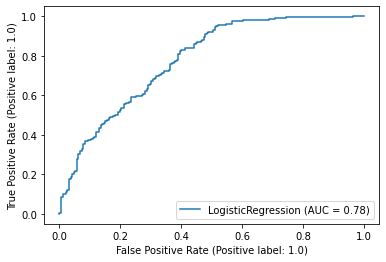

In [154]:
plot_roc_curve(lg,X_train, y_train)

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
knn = KNeighborsClassifier(n_neighbors=30,n_jobs=-1)

In [157]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [158]:
train_pred_knn = knn.predict(X_train)

In [159]:
confusion_matrix(y_train, train_pred_knn)

array([[ 12, 180],
       [  6, 416]], dtype=int64)

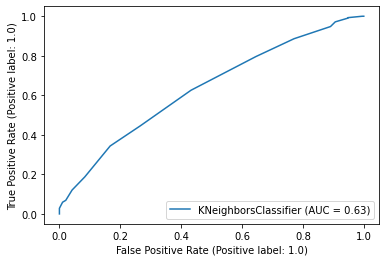

In [160]:
plot_roc_curve(knn, X_train, y_train);

In [161]:
accuracy_score(y_train, train_pred_knn)

0.6970684039087948

In [132]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [77]:
#!pip install imbalanced-learn
#!pip install imblearn
#!pip install scikit-learn==0.24

In [162]:
sm = SMOTETomek(0.5, n_jobs=-1)
print(sm)

SMOTETomek(n_jobs=-1, sampling_strategy=0.5)


In [163]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,0,0,1,0,360.0,1.0,5849.0,0,0,1,0.0,0.775842,-0.469345,0.000000
1,1,1,1,1,0,360.0,1.0,6091.0,1,0,0,0.0,0.296479,0.168288,0.033898
2,1,1,0,1,1,360.0,1.0,3000.0,0,0,1,0.0,-0.302916,-0.469345,-1.016949
3,1,1,0,0,0,360.0,1.0,4941.0,0,0,1,0.0,-0.460810,0.527696,-0.101695
4,1,0,0,1,0,360.0,1.0,6000.0,0,0,1,0.0,0.833018,-0.469345,0.254237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,360.0,1.0,2900.0,1,0,0,0.0,-0.340780,-0.469345,-0.932203
610,1,1,3,1,0,180.0,1.0,4106.0,1,0,0,-180.0,0.115865,-0.469345,-1.457627
611,1,1,1,1,0,360.0,1.0,8312.0,0,0,1,0.0,1.617569,-0.367865,2.152542
612,1,1,2,1,0,360.0,1.0,7583.0,0,0,1,0.0,1.432412,-0.469345,1.033898


In [164]:
y_train

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [165]:
X=np.array(X_train)
X_train
X_train_sm, y_train_sm = sm.fit_resample(X, y_train)

print(f'The Number of class before the fit \n {y_train.value_counts()}')

print(f'The Number of class after the fit \n {y_train_sm.value_counts()}')

The Number of class before the fit 
 1.0    422
0.0    192
Name: Loan_Status, dtype: int64
The Number of class after the fit 
 1.0    342
0.0    131
Name: Loan_Status, dtype: int64


In [166]:
lg.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [169]:
train_pred_sm = lg.predict(X_train_sm)

In [170]:
confusion_matrix(y_train_sm,train_pred_sm)

array([[ 57,  74],
       [ 12, 330]], dtype=int64)

In [146]:
#test_pred = lg.predict(X_test)
X_test

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Source,Total_Income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,1,0,1,0,360.0,1.0,test,5720.0,0,0,1,0.0,0.726997,-0.469345,-0.271186
1,1,1,1,1,0,360.0,1.0,test,4576.0,0,0,1,0.0,-0.274139,0.164905,0.000000
2,1,1,2,1,0,360.0,1.0,test,6800.0,0,0,1,0.0,0.454373,0.291755,1.389831
3,1,1,2,1,0,360.0,1.0,test,4886.0,0,0,1,0.0,-0.552821,0.607188,-0.440678
4,1,0,0,0,0,360.0,1.0,test,3276.0,0,0,1,0.0,-0.198410,-0.469345,-0.813559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,360.0,1.0,test,5786.0,0,0,1,0.0,0.079137,0.282030,-0.220339
363,1,1,0,1,0,360.0,1.0,test,4867.0,0,0,1,0.0,0.135555,-0.169556,-0.186441
364,1,0,0,1,0,360.0,1.0,test,5243.0,0,1,0,0.0,-0.208254,0.373362,0.000000
365,1,1,0,1,0,360.0,1.0,test,7393.0,1,0,0,0.0,0.454373,0.542495,0.542373


In [ ]:
sample_df['Loan_Status'] = test_pred

sample_df.to_csv('lg output.csv', index = False)

In [171]:
accuracy_score(y_train_sm, train_pred_sm)

0.8181818181818182

In [177]:
from sklearn.metrics import plot_confusion_matrix
class_names = y_train_sm
class_names

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
468    0.0
469    0.0
470    0.0
471    0.0
472    0.0
Name: Loan_Status, Length: 473, dtype: float64

In [178]:
disp = plot_confusion_matrix(lg, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title(title)


print(disp.confusion_matrix)

plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [182]:
cf_matrix = confusion_matrix(y_train_sm,train_pred_sm)
print(cf_matrix)

[[ 57  74]
 [ 12 330]]


<AxesSubplot:>

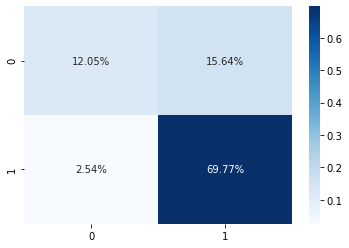

In [183]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

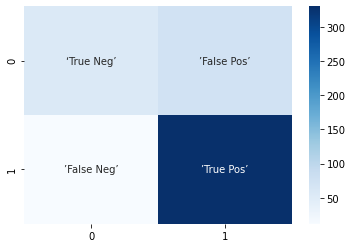

In [196]:
labels = ["‘True Neg’","’False Pos’","’False Neg’","’True Pos’"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [191]:
labels = ["‘True Neg’","’False Pos’","’False Neg’","’True Pos’"]

In [192]:
labels

['‘True Neg’', '’False Pos’', '’False Neg’', '’True Pos’']

<AxesSubplot:>

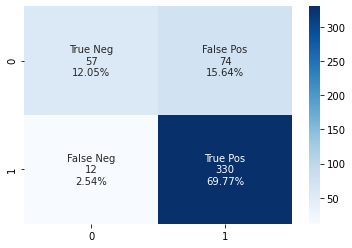

In [239]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')